In [1]:
from ultralytics import YOLO
import matplotlib.pyplot as plt
import cv2
import numpy as np
%matplotlib inline

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/home/fpt/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


In [3]:
model = YOLO("../assets/det_model.pt")

In [4]:
def plot_bboxes(results):
    img = results[0].orig_img # original image
    names = results[0].names # class names dict
    scores = results[0].boxes.conf .cpu() .numpy() # probabilities
    classes = results[0].boxes.cls .cpu() .numpy() # predicted classes
    boxes = results[0].boxes.xyxy .cpu() .numpy().astype(np.int32) # bboxes
    for score, cls, bbox in zip(scores, classes, boxes): # loop over all bboxes
        class_label = names[cls] # class name
        label = f"{class_label} : {score:0.2f}" # bbox label
        lbl_margin = 3 #label margin
        img = cv2.rectangle(img, (bbox[0], bbox[1]),
                            (bbox[2], bbox[3]),
                            color=(0, 0, 255),
                            thickness=1)
        label_size = cv2.getTextSize(label, # labelsize in pixels 
                                     fontFace=cv2.FONT_HERSHEY_SIMPLEX, 
                                     fontScale=1, thickness=1)
        lbl_w, lbl_h = label_size[0] # label w and h
        lbl_w += 2* lbl_margin # add margins on both sides
        lbl_h += 2*lbl_margin
        img = cv2.rectangle(img, (bbox[0], bbox[1]), # plot label background
                             (bbox[0]+lbl_w, bbox[1]-lbl_h),
                             color=(0, 0, 255), 
                             thickness=-1) # thickness=-1 means filled rectangle
        cv2.putText(img, label, (bbox[0]+ lbl_margin, bbox[1]-lbl_margin), # write label to the image
                    fontFace=cv2.FONT_HERSHEY_SIMPLEX,
                    fontScale=1.0, color=(255, 255, 255 ),
                    thickness=1)
    return img


image 1/1 /media/fpt/Elements/TuongHH/NomOCR_Engine/notebooks/../data/demo/bandap1 (Small).png: 512x640 23 nom_patchs, 4.9ms
Speed: 1.1ms preprocess, 4.9ms inference, 0.5ms postprocess per image at shape (1, 3, 512, 640)


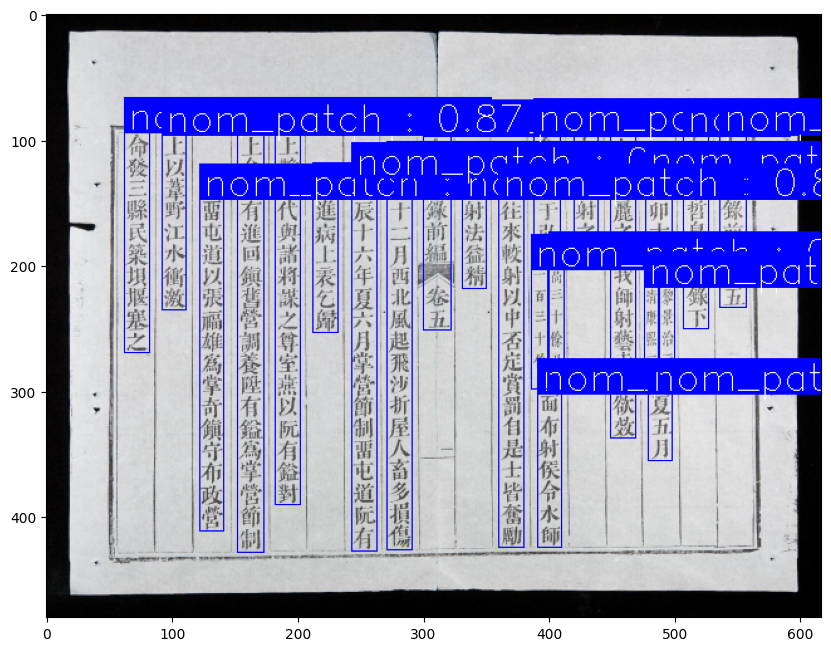

In [7]:
results = model("../data/demo/bandap1 (Small).png")
plot_img = plot_bboxes(results)
plt.figure(figsize=(10, 10))
plt.imshow(plot_img)


In [11]:
results

[ultralytics.engine.results.Results object with attributes:
 
 boxes: ultralytics.engine.results.Boxes object
 keypoints: None
 masks: None
 names: {0: 'nom_patch'}
 obb: None
 orig_img: array([[[0, 0, 0],
         [2, 2, 2],
         [3, 3, 3],
         ...,
         [1, 1, 1],
         [0, 0, 0],
         [2, 2, 2]],
 
        [[1, 1, 1],
         [3, 3, 3],
         [2, 2, 2],
         ...,
         [1, 1, 1],
         [0, 0, 0],
         [2, 2, 2]],
 
        [[2, 2, 2],
         [2, 2, 2],
         [2, 2, 2],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [1, 1, 1]],
 
        ...,
 
        [[4, 4, 4],
         [3, 3, 3],
         [3, 3, 3],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],
 
        [[6, 6, 6],
         [4, 4, 4],
         [1, 1, 1],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],
 
        [[1, 1, 1],
         [3, 3, 3],
         [3, 3, 3],
         ...,
         [0, 0, 0],
         [0, 0, 0],


In [10]:
results[0].boxes.xyxy.to("cpu").numpy()

array([[     212.82,      146.58,      232.76,      253.89],
       [     449.64,      96.977,      469.42,      337.63],
       [     152.91,      96.217,      173.25,      428.03],
       [     271.12,      129.71,      291.84,      426.02],
       [     122.01,      147.06,      141.92,      411.67],
       [     62.403,      94.884,      82.531,      269.52],
       [     182.36,      96.485,      202.49,      390.93],
       [     420.13,      95.828,      439.08,      199.65],
       [     331.08,      147.52,      350.73,      218.04],
       [     391.12,      302.06,      410.22,      424.08],
       [     300.08,      97.324,      322.46,      251.28],
       [     388.94,      95.296,       409.2,      199.62],
       [     243.12,      130.86,      263.06,       427.2],
       [     477.27,      129.56,      498.73,      215.48],
       [     360.41,      147.53,      380.16,      424.43],
       [      507.7,      96.001,      527.99,      250.59],
       [     92.286,    


image 1/1 /mnt/d/FPT_IDA/NomOCR_Engine/notebooks/../data/demo/bandap1 1.png: 416x640 21 nom_patchs, 92.3ms
Speed: 1.3ms preprocess, 92.3ms inference, 5.5ms postprocess per image at shape (1, 3, 416, 640)


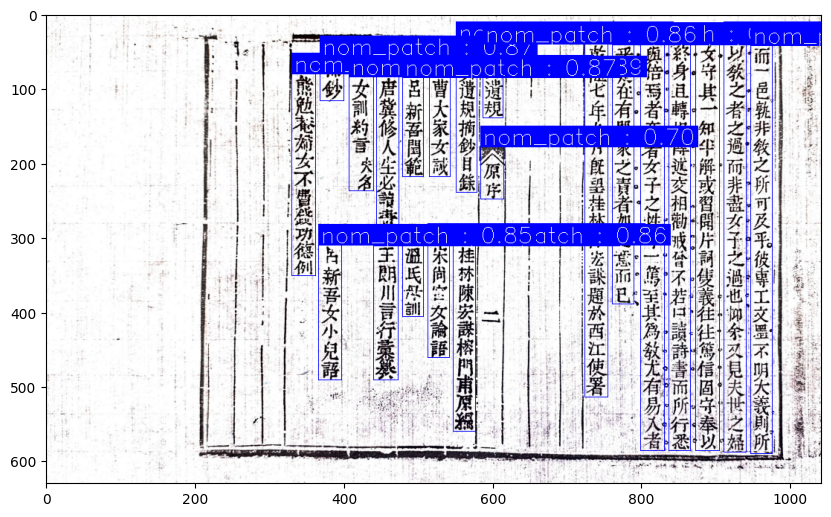

In [24]:
results = model("../data/demo/bandap1 1.png")
plot_img = plot_bboxes(results)
plt.figure(figsize=(10, 10))
plt.imshow(plot_img)



image 1/1 /mnt/d/FPT_IDA/NomOCR_Engine/notebooks/../data/demo/bandap2_1.png: 480x640 21 nom_patchs, 36.1ms
Speed: 1.6ms preprocess, 36.1ms inference, 1.7ms postprocess per image at shape (1, 3, 480, 640)


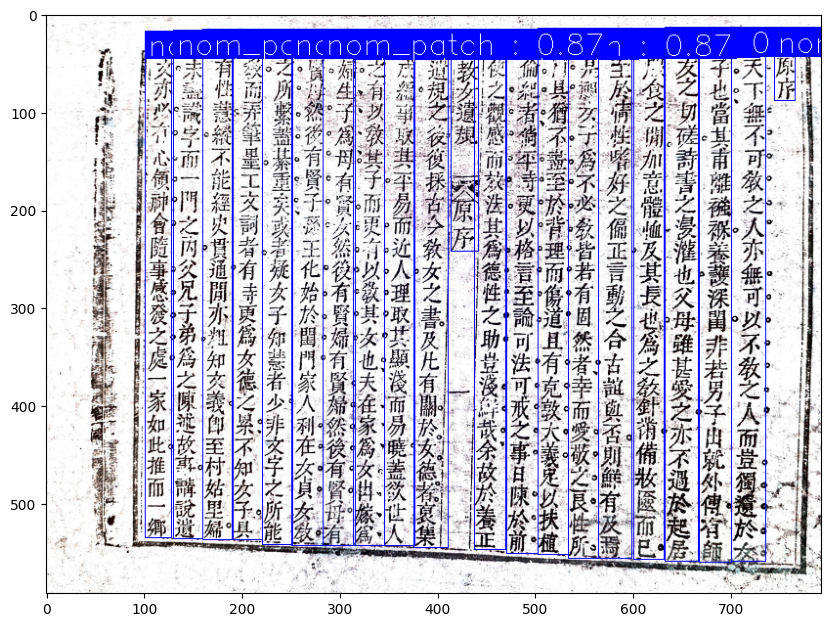

In [25]:
results = model("../data/demo/bandap2_1.png")
plot_img = plot_bboxes(results)
plt.figure(figsize=(10, 10))
plt.imshow(plot_img)



image 1/1 /mnt/d/FPT_IDA/NomOCR_Engine/notebooks/../data/demo/test_2.jpg: 512x640 23 nom_patchs, 24.8ms
Speed: 1.7ms preprocess, 24.8ms inference, 1.4ms postprocess per image at shape (1, 3, 512, 640)


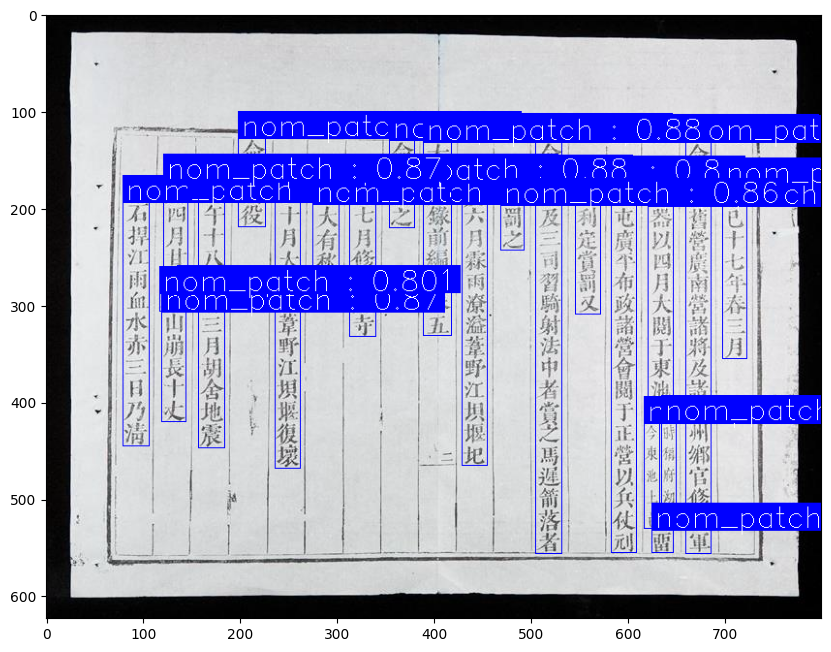

In [26]:
results = model("../data/demo/test_2.jpg")
plot_img = plot_bboxes(results)
plt.figure(figsize=(10, 10))
plt.imshow(plot_img)
